#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TESTING DATA - SPLIT (20%)
#### KNN Model using Bayesian Optimization 

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.95      | 8.116     |
| 2         | 0.935     | 19.06     |
| 3         | 0.94      | 14.91     |
| 4         | 0.945     | 12.37     |
| 5         | 0.935     | 3.964     |
| 6         | 0.95      | 8.058     |
| 7         | 0.945     | 10.22     |
| 8         | 0.945     | 1.001     |
| 9         | 0.95      | 6.671     |
| 10        | 0.955     | 7.199     |
| 11        | 0.945     | 9.127     |
| 12        | 0.94      | 16.84     |
| 13        | 0.94      | 11.3      |
| 14        | 0.945     | 13.45     |
| 15        | 0.93      | 2.157     |
| 16        | 0.96      | 5.531     |
| 17        | 0.96      | 5.125     |
| 18        | 0.96      | 5.324     |
| 19        | 0.96      | 5.913     |
| 20        | 0.96      | 5.751     |
| 21        | 0.935     | 20.0      |
| 22        | 0.94      | 4.838     |
| 23        | 0.94      | 17.9      |
| 24        | 0.96      | 5.751     |
| 25        

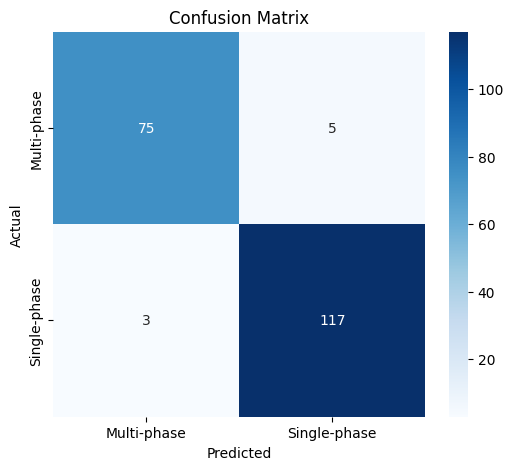

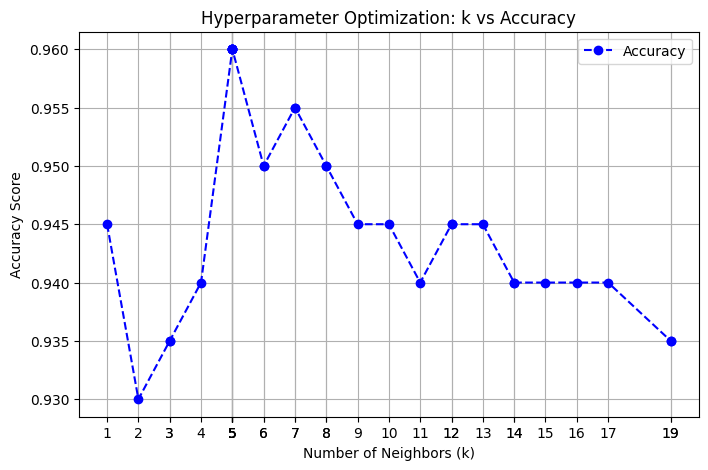

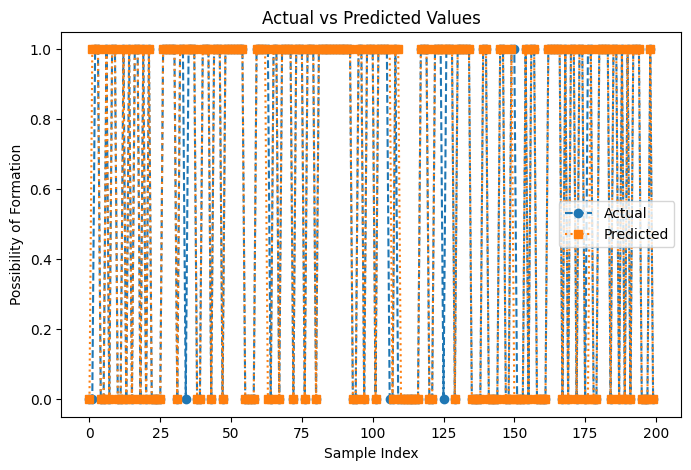

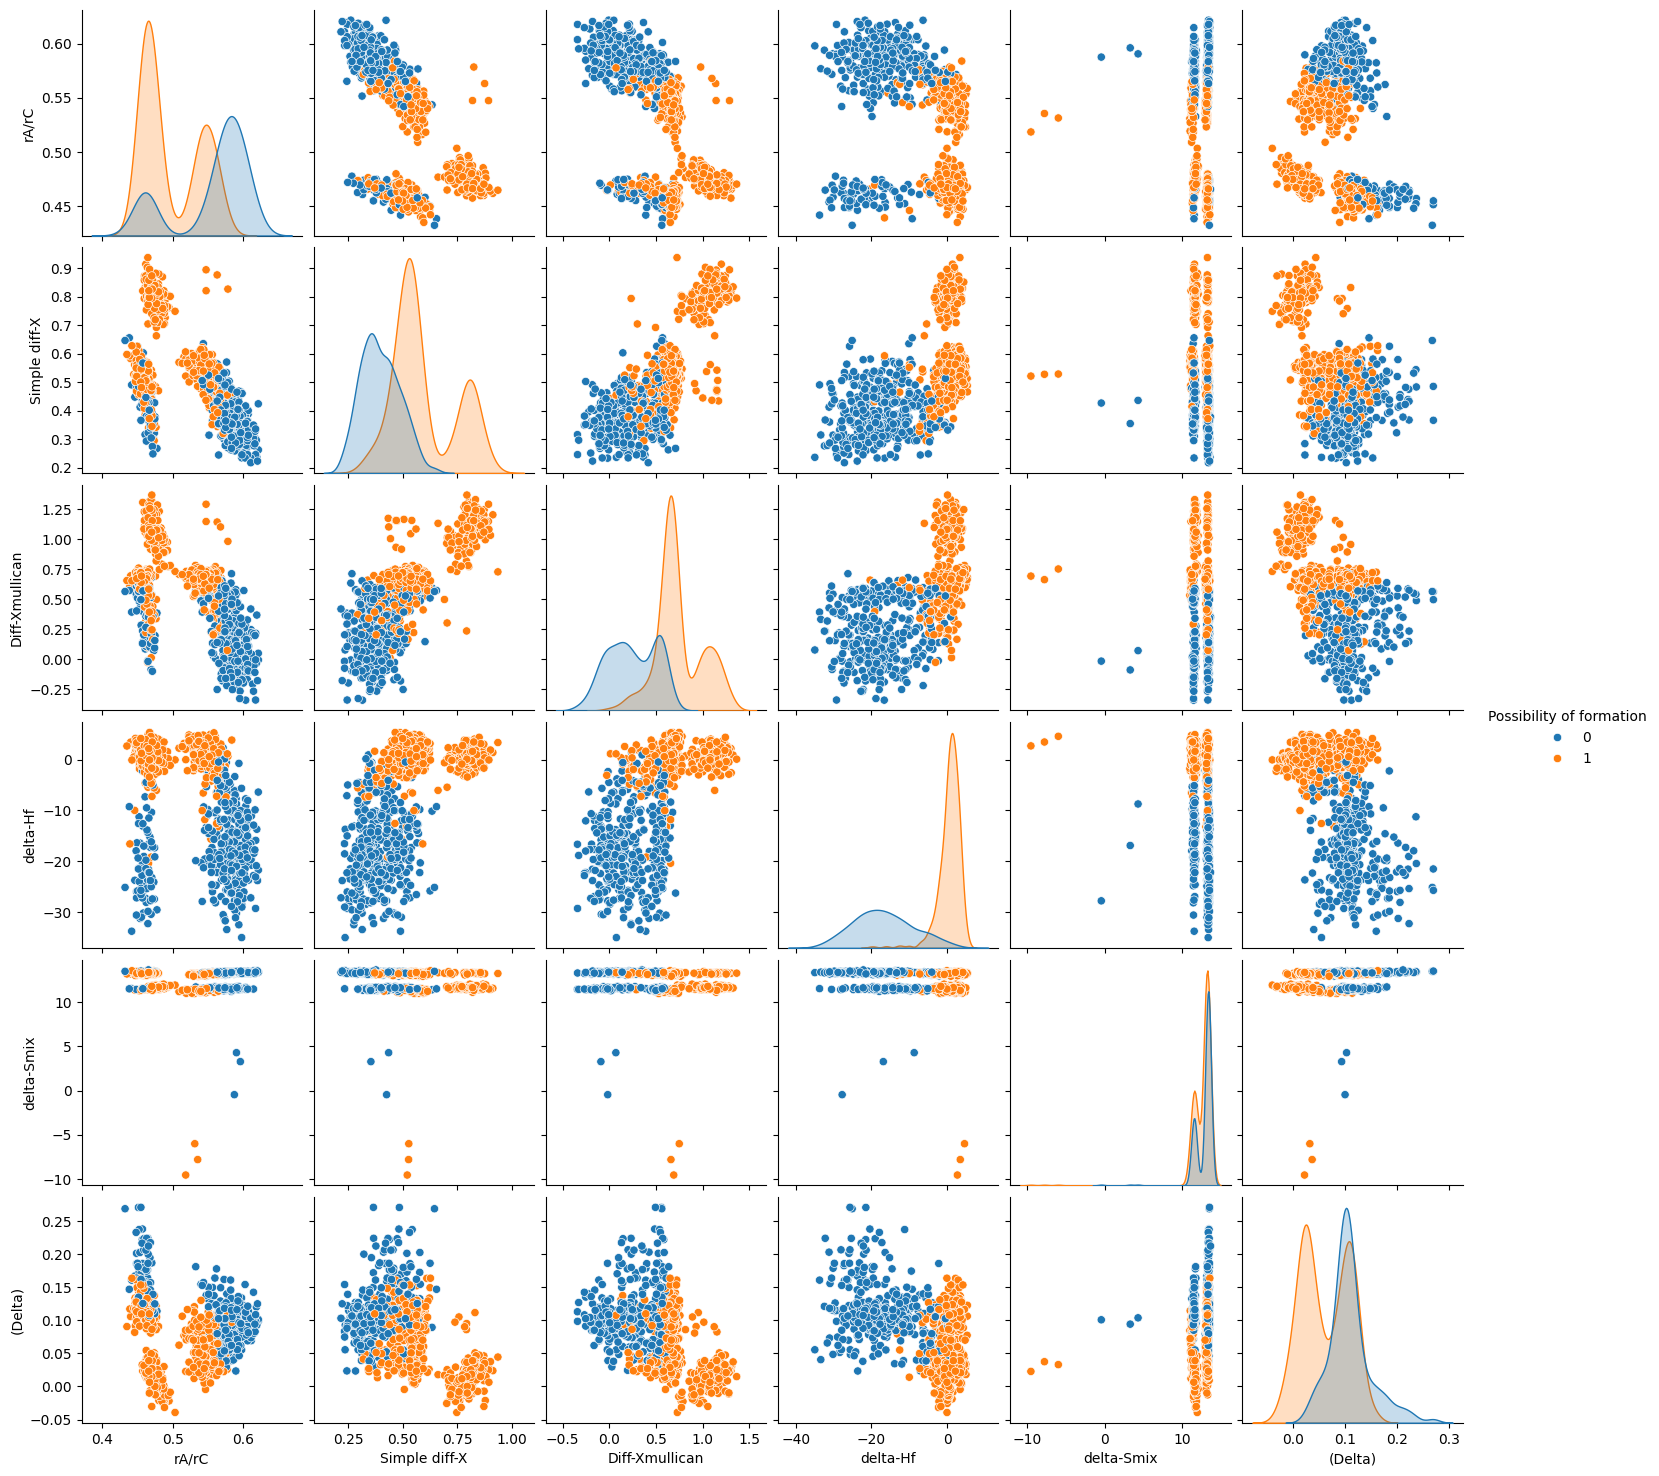

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1000_CTGAN.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def knn_evaluate(n_neighbors):
    n_neighbors = int(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=knn_evaluate,
    pbounds={'n_neighbors': (1, 20)},  # K values between 1 and 20
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=25)

# Get best parameters
best_k = int(optimizer.max['params']['n_neighbors'])
print(f"Best number of neighbors: {best_k}")

# Train optimized KNN model
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Extract hyperparameter values and corresponding accuracy scores from Bayesian Optimization
k_values = [int(res["params"]["n_neighbors"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# Sort values for better visualization
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# Plot hyperparameter vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

def plot_pairplot(df):
    sns.pairplot(df, hue="Possibility of formation", diag_kind="kde")
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)
plot_pairplot(df)

#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TEST DATA - BORIDES TEST DATA (33 Data Points)
#### KNN Model using Bayesian Optimization 

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.8824    | 8.116     |
| 2         | 0.8824    | 19.06     |
| 3         | 0.8529    | 14.91     |
| 4         | 0.8824    | 12.37     |
| 5         | 0.8824    | 3.964     |
| 6         | 0.8824    | 8.215     |
| 7         | 0.8824    | 10.61     |
| 8         | 0.8529    | 1.001     |
| 9         | 0.9118    | 5.736     |
| 10        | 0.9118    | 6.387     |
| 11        | 0.9118    | 6.065     |
| 12        | 0.8824    | 17.39     |
| 13        | 0.9118    | 5.118     |
| 14        | 0.9118    | 5.378     |
| 15        | 0.8824    | 20.0      |
| 16        | 0.9118    | 6.722     |
| 17        | 0.9118    | 6.578     |
| 18        | 0.9118    | 4.896     |
| 19        | 0.9118    | 5.559     |
| 20        | 0.9118    | 6.923     |
| 21        | 0.8824    | 9.494     |
| 22        | 0.9118    | 5.908     |
| 23        | 0.9118    | 4.99      |
| 24        | 0.9118    | 6.226     |
| 25        

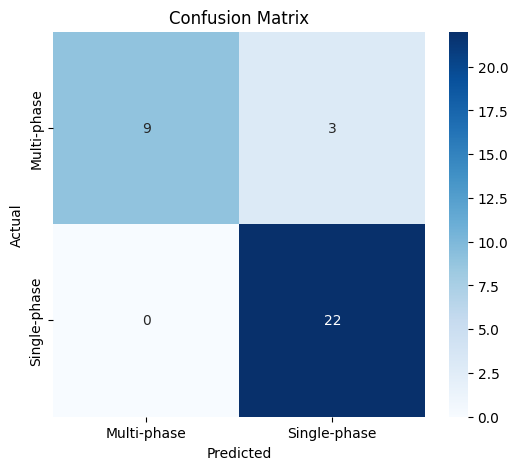

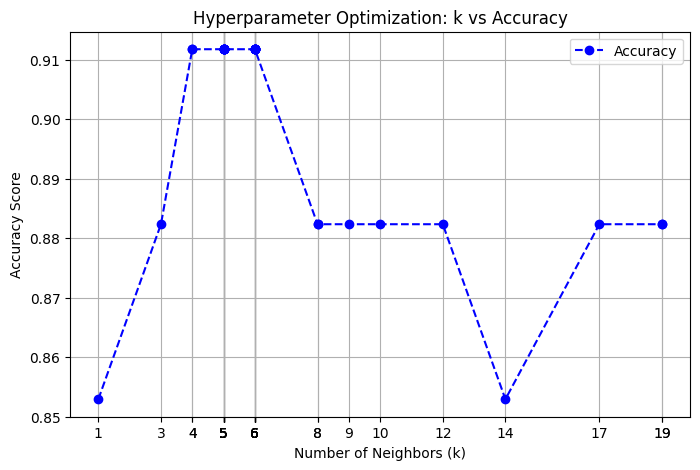

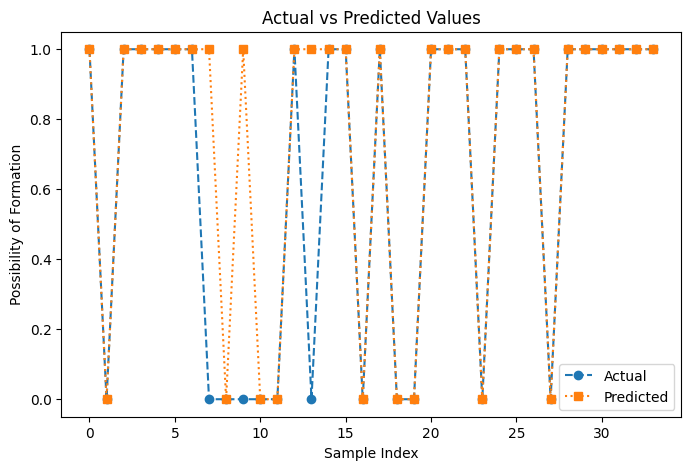

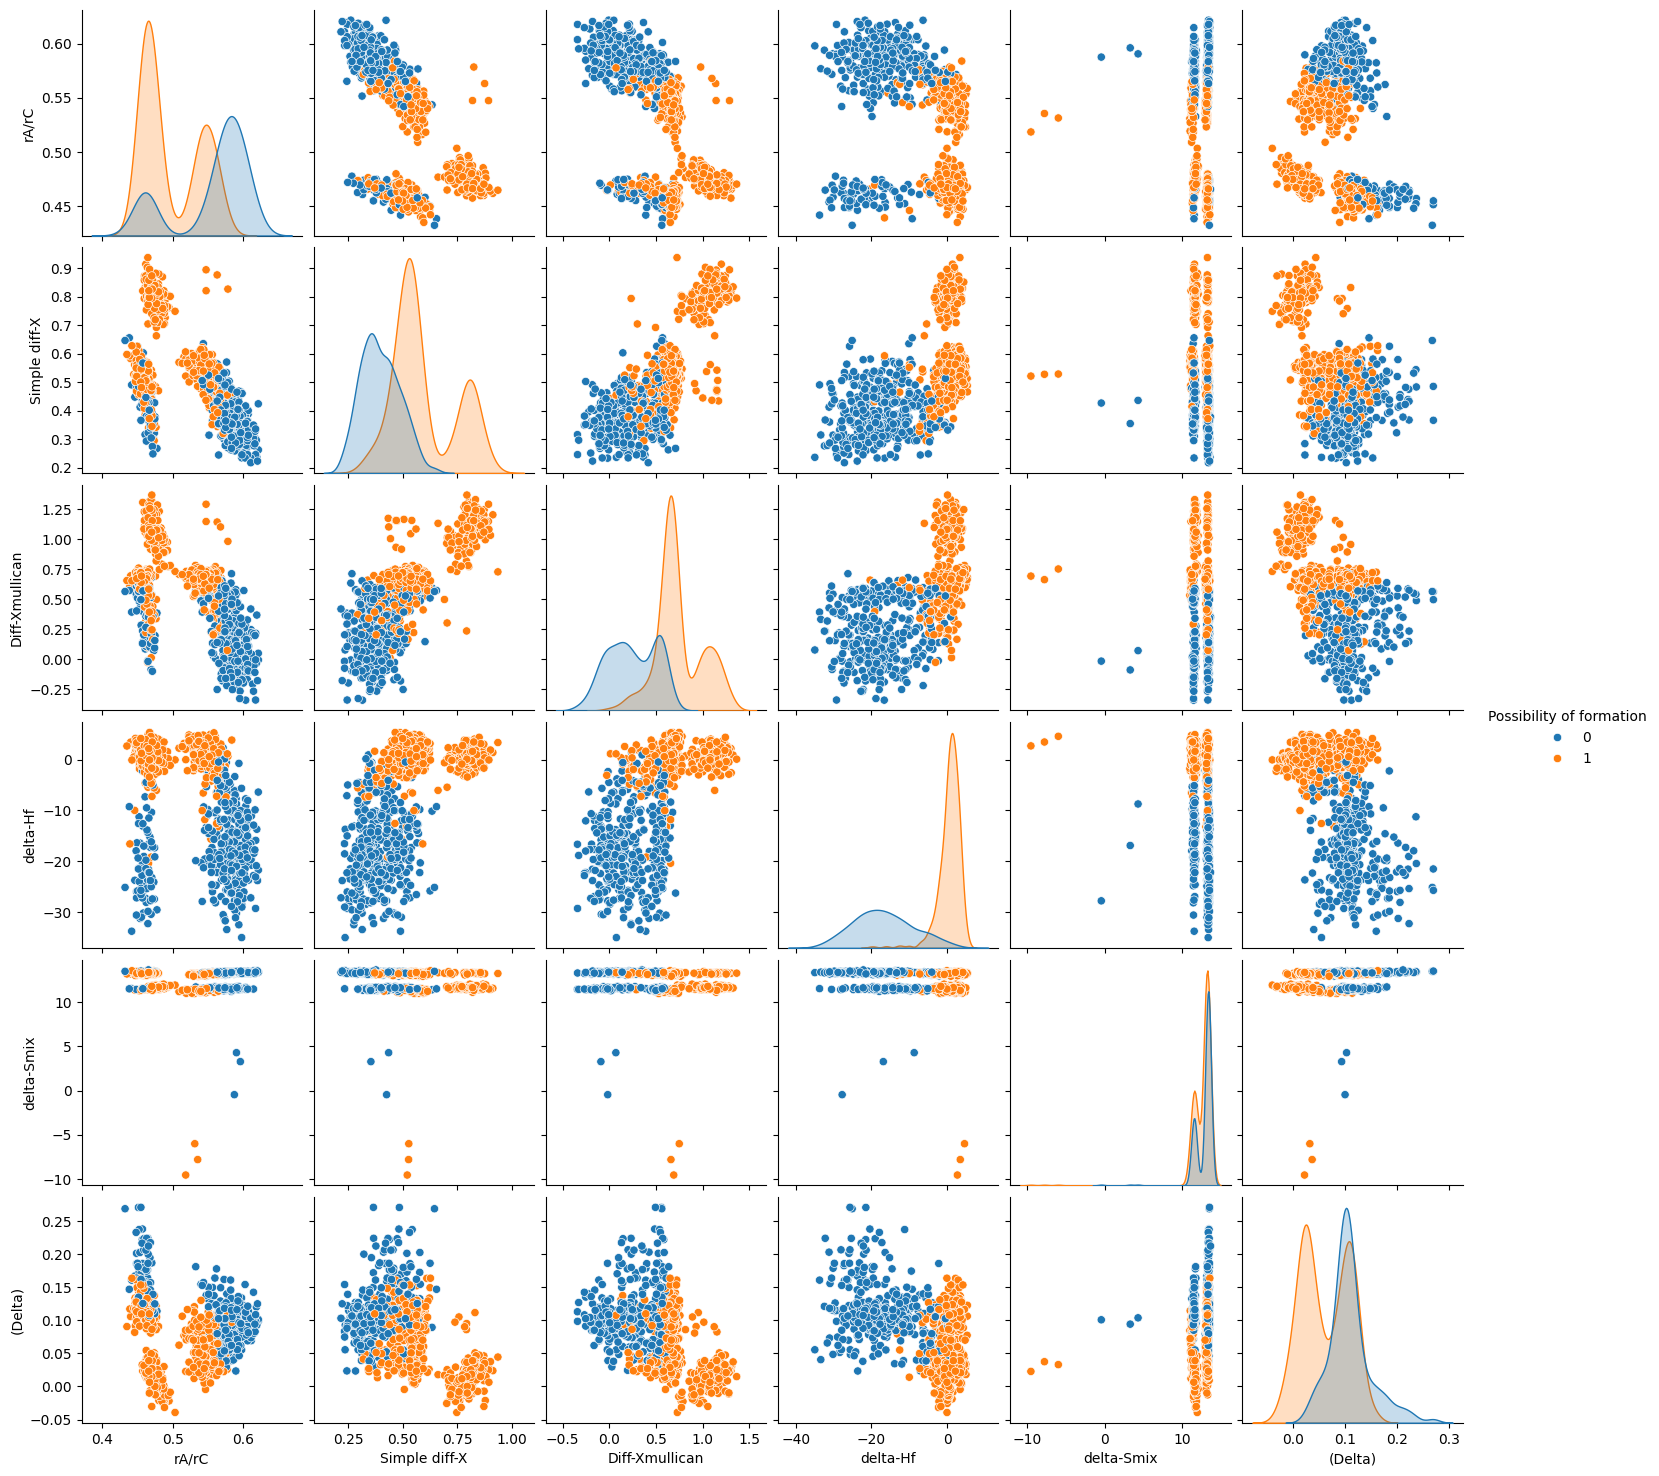

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def knn_evaluate(n_neighbors):
    n_neighbors = int(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=knn_evaluate,
    pbounds={'n_neighbors': (1, 20)},  # K values between 1 and 20
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=25)

# Get best parameters
best_k = int(optimizer.max['params']['n_neighbors'])
print(f"Best number of neighbors: {best_k}")

# Train optimized KNN model
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Extract hyperparameter values and corresponding accuracy scores from Bayesian Optimization
k_values = [int(res["params"]["n_neighbors"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# Sort values for better visualization
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# Plot hyperparameter vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

def plot_pairplot(df):
    sns.pairplot(df, hue="Possibility of formation", diag_kind="kde")
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)
plot_pairplot(df)

#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TEST DATA - SUPPLEMENTARY DATA (37 Data Points)
#### KNN Model using Bayesian Optimization 

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.8919    | 8.116     |
| 2         | 0.8919    | 19.06     |
| 3         | 0.8649    | 14.91     |
| 4         | 0.8919    | 12.37     |
| 5         | 0.8649    | 3.964     |
| 6         | 0.8919    | 18.98     |
| 7         | 0.8919    | 10.34     |
| 8         | 0.8919    | 1.001     |
| 9         | 0.9189    | 6.653     |
| 10        | 0.9189    | 5.979     |
| 11        | 0.8919    | 17.17     |
| 12        | 0.9189    | 6.309     |
| 13        | 0.9189    | 5.442     |
| 14        | 0.8919    | 7.154     |
| 15        | 0.8919    | 9.188     |
| 16        | 0.9189    | 2.212     |
| 17        | 0.9189    | 2.715     |
| 18        | 0.8919    | 20.0      |
| 19        | 0.8919    | 11.35     |
| 20        | 0.8649    | 13.43     |
| 21        | 0.8919    | 16.22     |
| 22        | 0.8919    | 1.758     |
| 23        | 0.9189    | 2.465     |
| 24        | 0.9189    | 5.442     |
| 25        

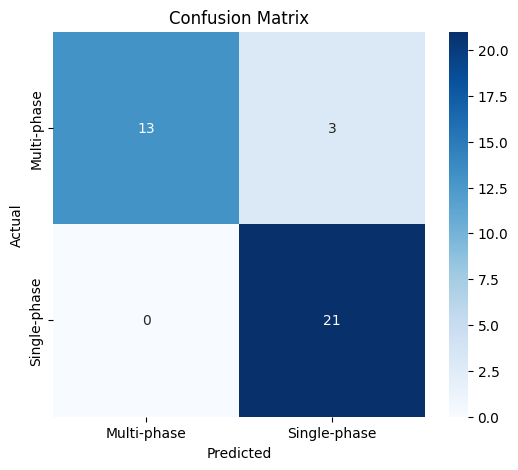

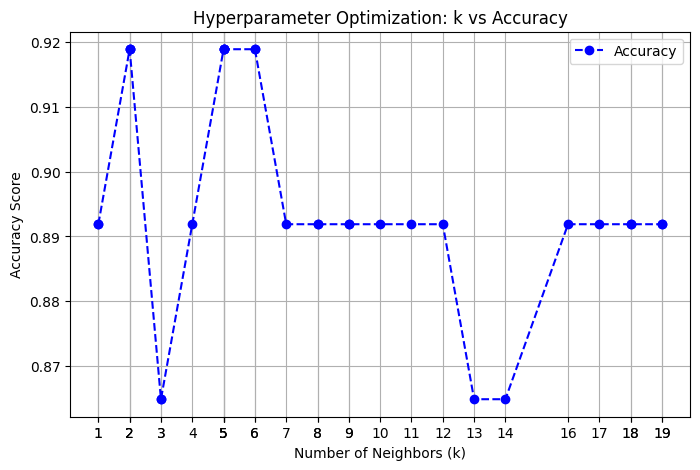

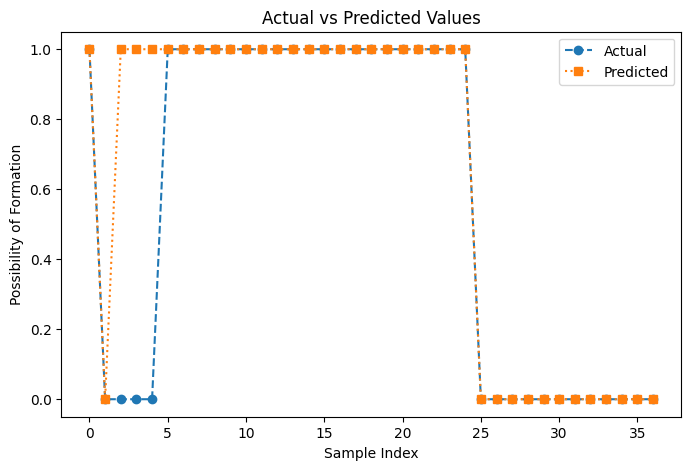

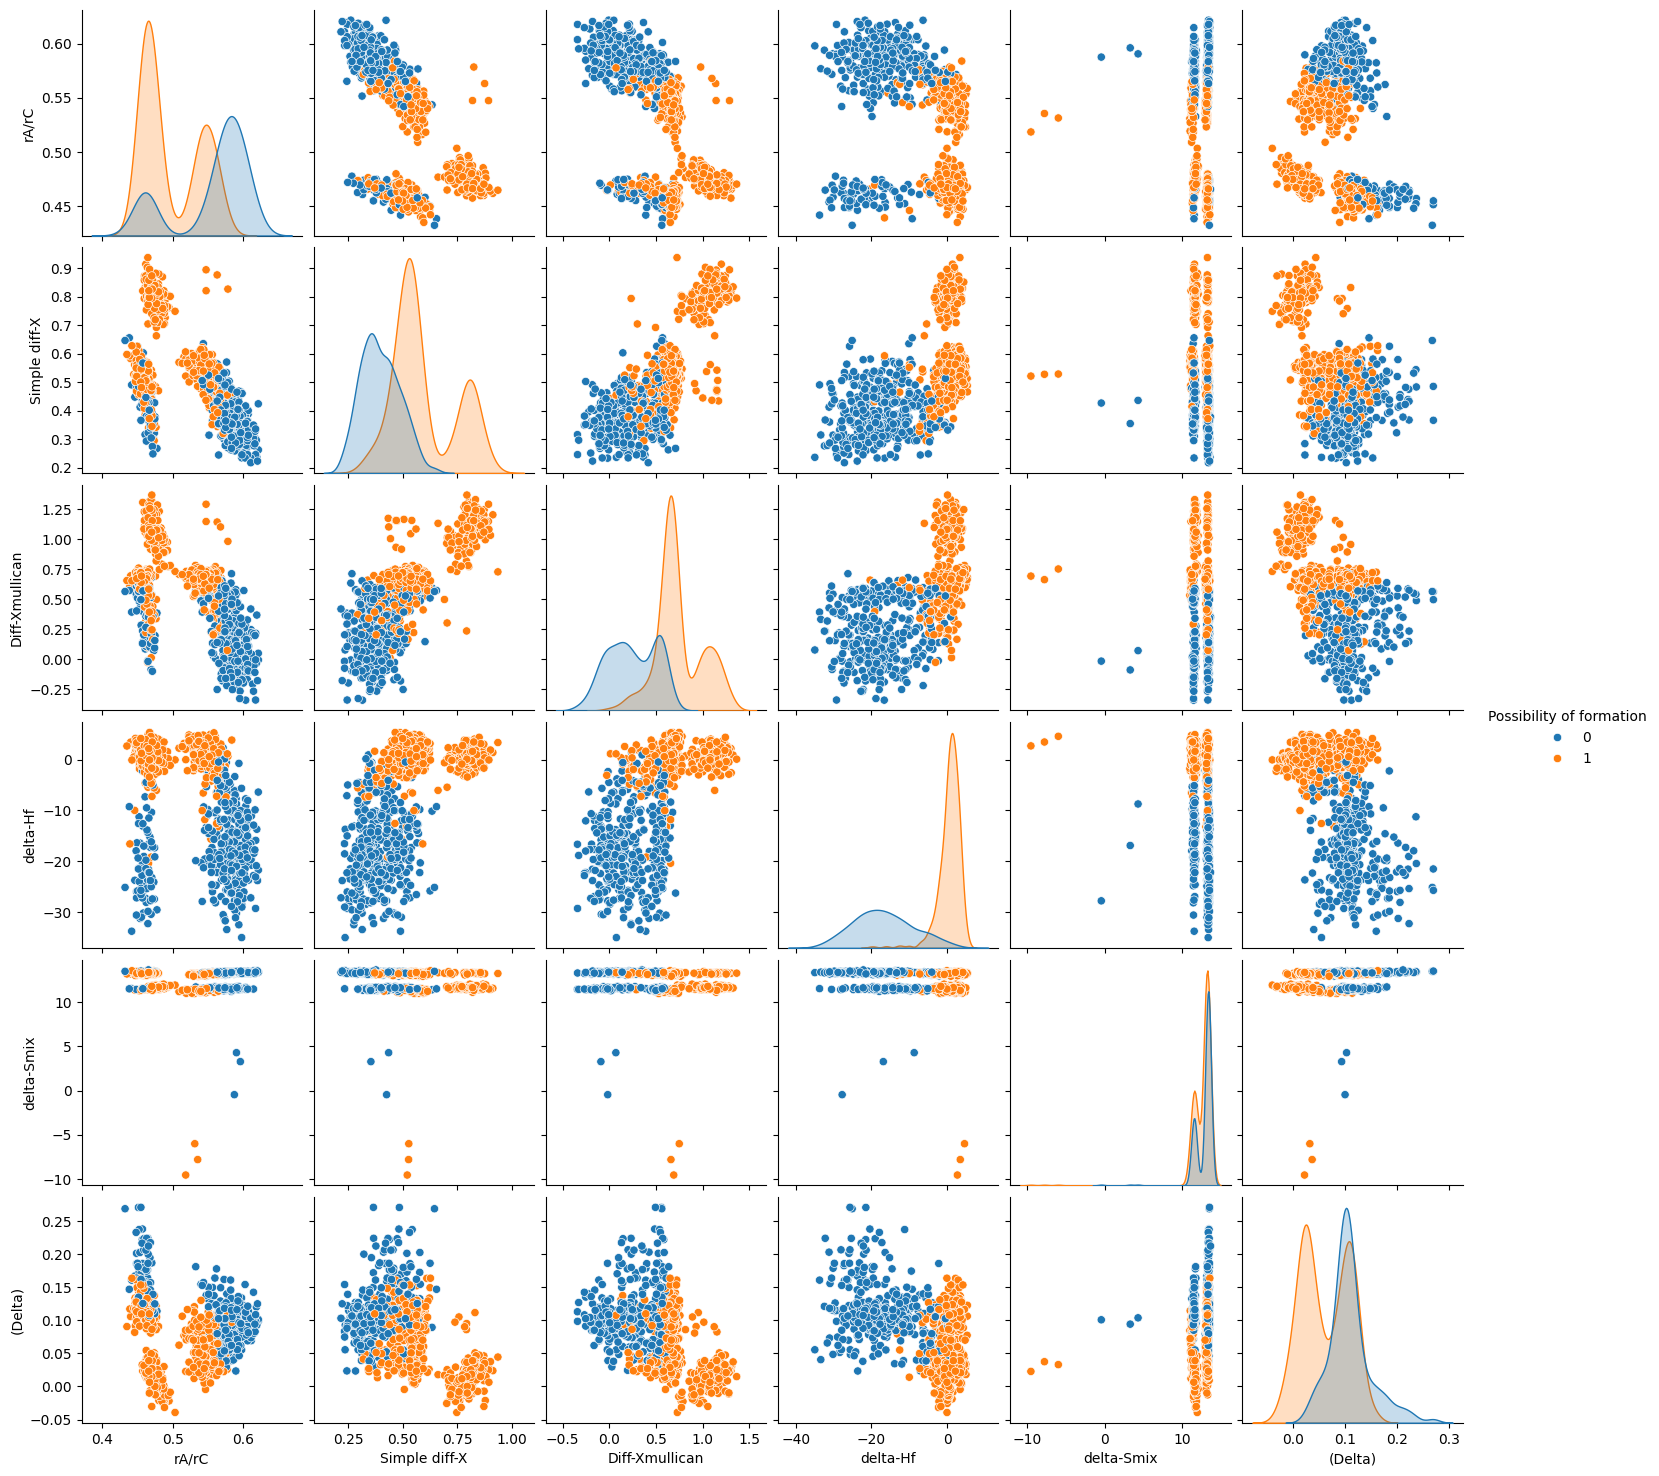

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('supplementary.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def knn_evaluate(n_neighbors):
    n_neighbors = int(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=knn_evaluate,
    pbounds={'n_neighbors': (1, 20)},  # K values between 1 and 20
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=25)

# Get best parameters
best_k = int(optimizer.max['params']['n_neighbors'])
print(f"Best number of neighbors: {best_k}")

# Train optimized KNN model
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Extract hyperparameter values and corresponding accuracy scores from Bayesian Optimization
k_values = [int(res["params"]["n_neighbors"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# Sort values for better visualization
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# Plot hyperparameter vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

def plot_pairplot(df):
    sns.pairplot(df, hue="Possibility of formation", diag_kind="kde")
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)
plot_pairplot(df)

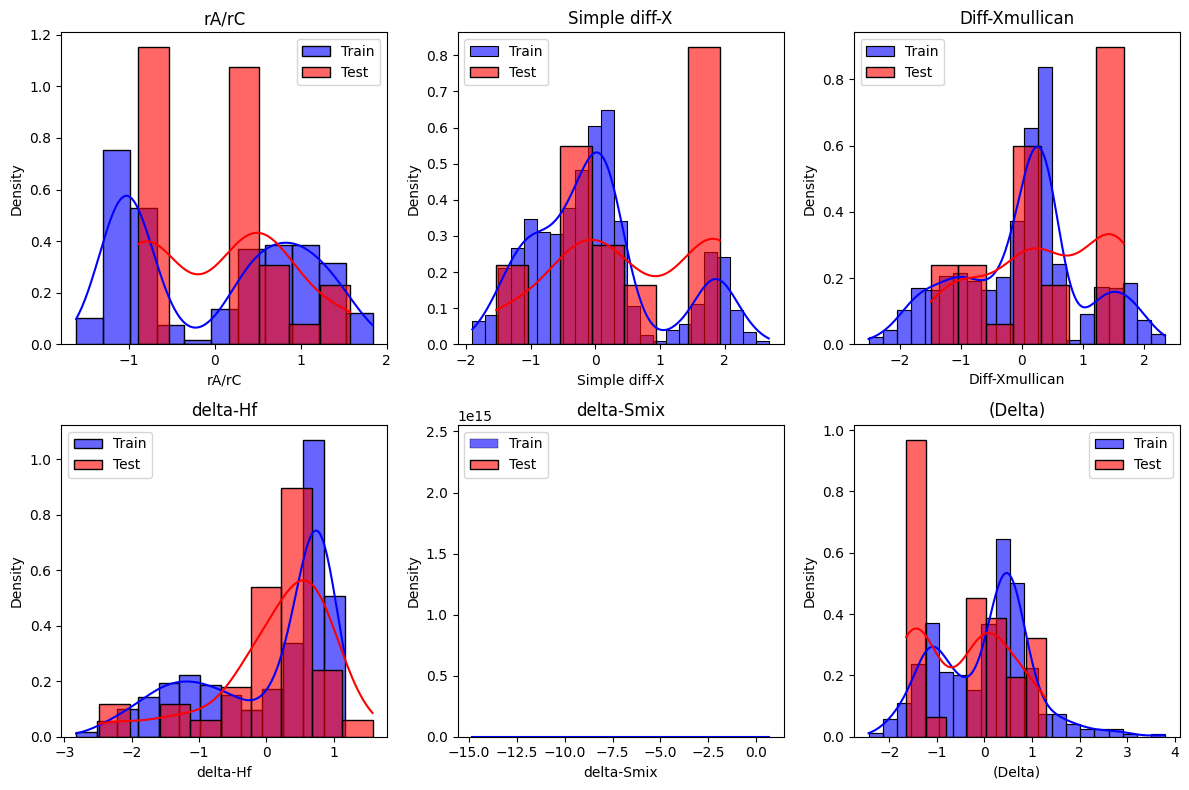

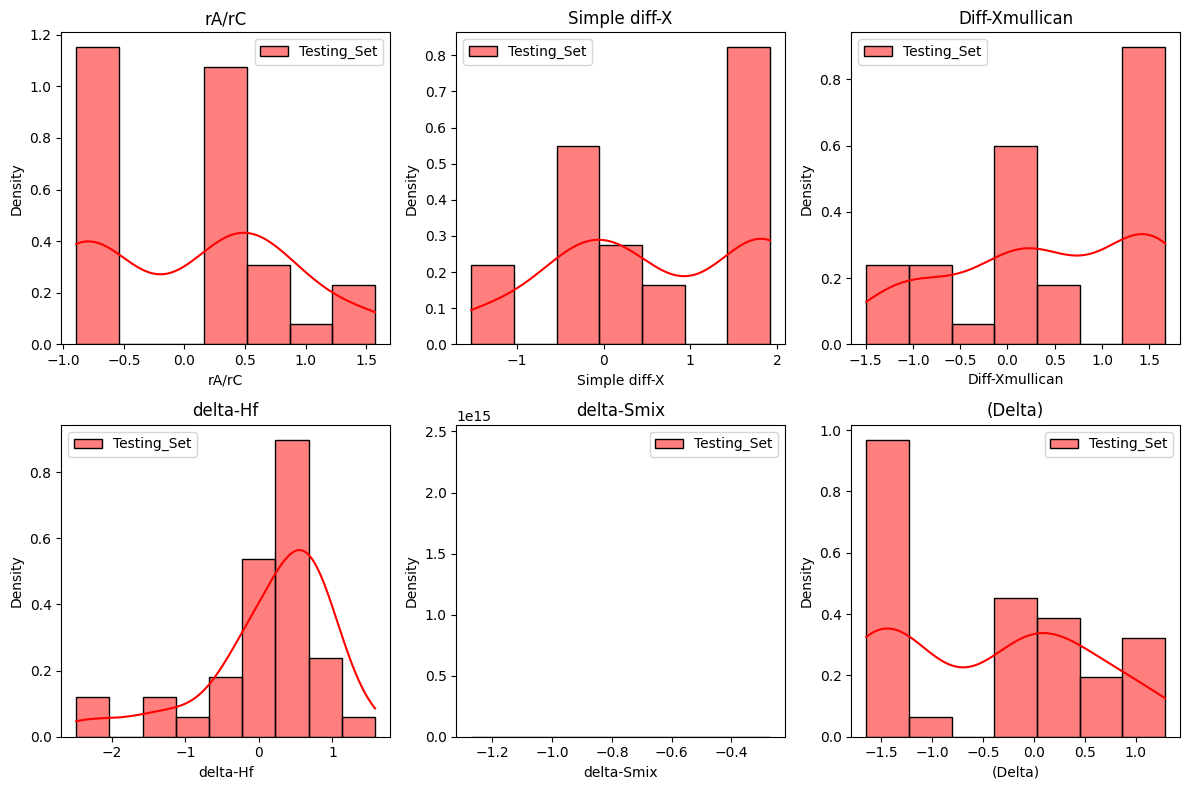

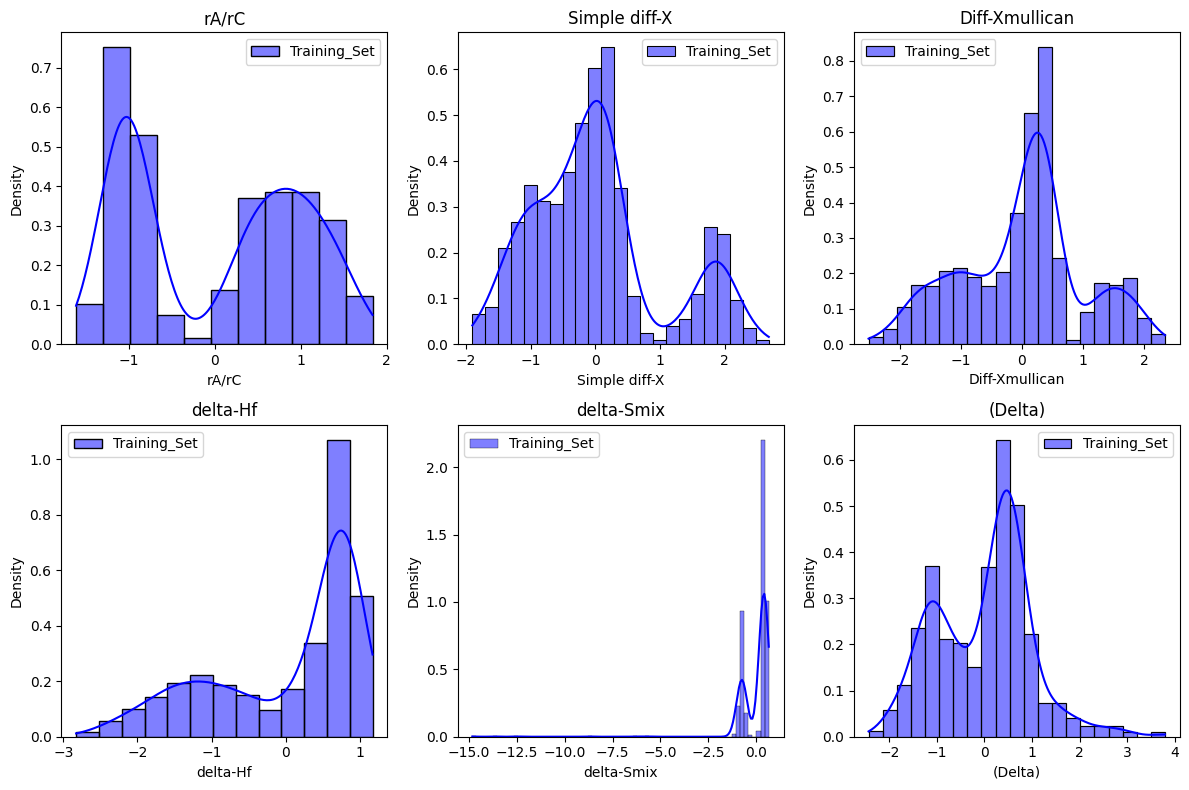

In [31]:
# Function to plot feature distributions (Only for feature columns)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_distributions(original_df):
    feature_columns = original_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(original_df[col], kde=True, color='red', label='Testing_Set', stat='density')
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_feature_distributions_2(original_df):
    feature_columns = original_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(original_df[col], kde=True, color='blue', label='Training_Set', stat='density')
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.show()
# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Function to plot feature distributions for both training and testing datasets
def plot_feature_distributions_combined(train_df, test_df):
    feature_columns = train_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(train_df[col], kde=True, color='blue', label='Train', stat='density', alpha=0.6)
        sns.histplot(test_df[col], kde=True, color='red', label='Test', stat='density', alpha=0.6)
        plt.title(col)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot feature distributions for both train and test datasets
plot_feature_distributions_combined(X_train_df, X_test_df)

# Plot feature distributions
plot_feature_distributions(X_test_df)
plot_feature_distributions_2(X_train_df)

#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TESTING DATA - SPLIT (20%)
#### Random Forest Model using Bayesian Optimization 

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.965     | 81.16     |
| 2         | 0.965     | 190.6     |
| 3         | 0.965     | 149.1     |
| 4         | 0.965     | 123.7     |
| 5         | 0.965     | 39.64     |
| 6         | 0.965     | 105.6     |
| 7         | 0.955     | 15.42     |
| 8         | 0.965     | 103.7     |
| 9         | 0.965     | 58.22     |
| 10        | 0.965     | 170.2     |
| 11        | 0.965     | 200.0     |
| 12        | 0.965     | 136.7     |
| 13        | 0.965     | 48.14     |
| 14        | 0.965     | 70.05     |
| 15        | 0.965     | 160.0     |
| 16        | 0.965     | 91.34     |
| 17        | 0.965     | 180.5     |
| 18        | 0.965     | 115.8     |
| 19        | 0.965     | 130.5     |
| 20        | 0.965     | 43.29     |
| 21        | 0.965     | 143.2     |
| 22        | 0.965     | 64.31     |
| 23        | 0.965     | 195.7     |
| 24        | 0.965     | 96.78     |
| 25        

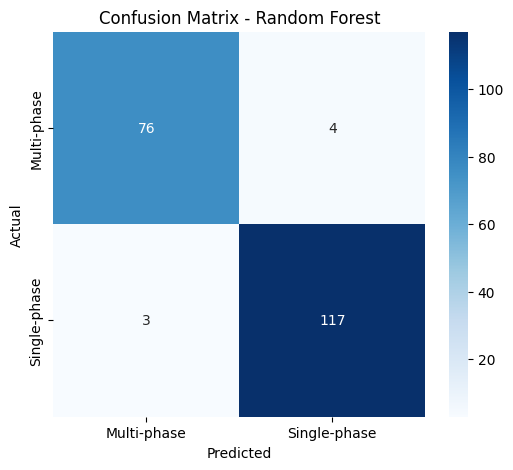

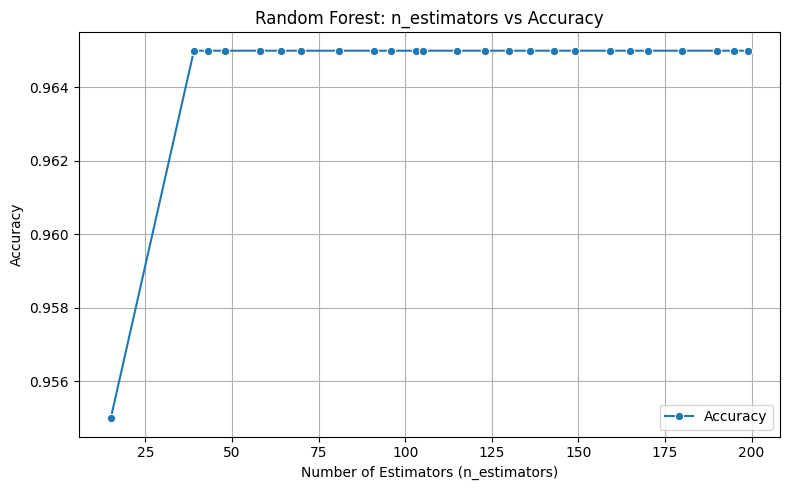

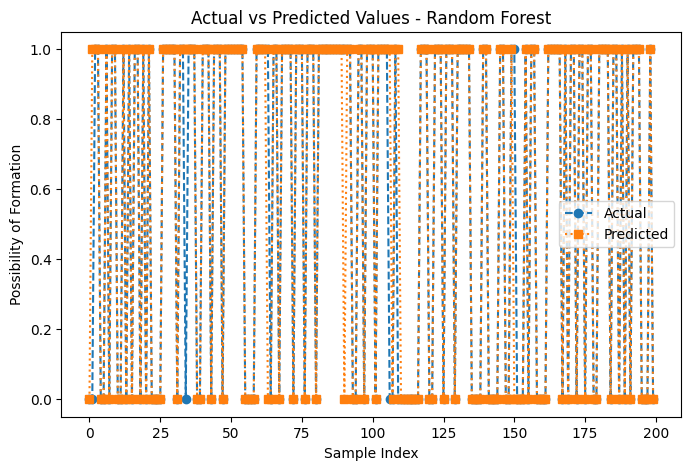

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1000_CTGAN.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def rf_evaluate(n_estimators):
    n_estimators = int(n_estimators)  # Convert float to int
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds={'n_estimators': (10, 200)},  # Number of trees between 10 and 200
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=20)

# Get best parameters
best_n_estimators = int(optimizer.max['params']['n_estimators'])
print(f"Best number of estimators: {best_n_estimators}")

# Train optimized Random Forest model
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Function to plot feature distributions
def plot_feature_distributions(train_df, test_df):
    feature_columns = train_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(train_df[col], kde=True, color='blue', label='Train', stat='density', alpha=0.6)
        sns.histplot(test_df[col], kde=True, color='red', label='Test', stat='density', alpha=0.6)
        plt.title(col)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values - Random Forest")
    plt.legend()
    plt.show()

# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Extract optimization history
iteration_data = []
for i, res in enumerate(optimizer.res):
    iteration_data.append({
        'iteration': i + 1,
        'n_estimators': int(res['params']['n_estimators']),
        'accuracy': res['target']
    })

# Convert to DataFrame
opt_df = pd.DataFrame(iteration_data)

# Sort by number of estimators if desired
opt_df = opt_df.sort_values(by='n_estimators')

# Plot hyperparameter vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=opt_df, x='n_estimators', y='accuracy', marker='o', label='Accuracy')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest: n_estimators vs Accuracy")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plot actual vs predicted values
plot_actual_vs_predicted(y_test, y_pred)




#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TEST DATA - BORIDES TEST DATA (33 Data Points)
#### Random Forest model using bayesian optimization  

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.8529    | 81.16     |
| 2         | 0.8529    | 190.6     |
| 3         | 0.8529    | 149.1     |
| 4         | 0.8529    | 123.7     |
| 5         | 0.8529    | 39.64     |
| 6         | 0.8824    | 10.0      |
| 7         | 0.8824    | 10.78     |
| 8         | 0.8824    | 18.72     |
| 9         | 0.8529    | 15.74     |
| 10        | 0.8529    | 20.48     |
| 11        | 0.8824    | 17.82     |
| 12        | 0.8824    | 12.39     |
| 13        | 0.8529    | 102.5     |
| 14        | 0.8529    | 169.9     |
| 15        | 0.8529    | 60.41     |
| 16        | 0.8529    | 136.5     |
| 17        | 0.8529    | 91.82     |
| 18        | 0.8529    | 113.1     |
| 19        | 0.8529    | 180.2     |
| 20        | 0.8529    | 159.5     |
| 21        | 0.8824    | 13.4      |
| 22        | 0.8529    | 50.03     |
| 23        | 0.8529    | 70.79     |
| 24        | 0.8529    | 200.0     |
| 25        

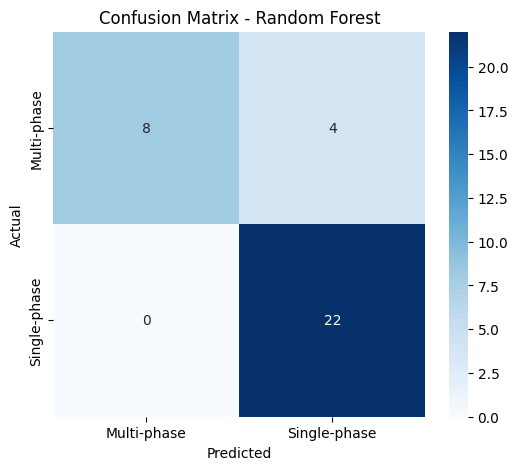

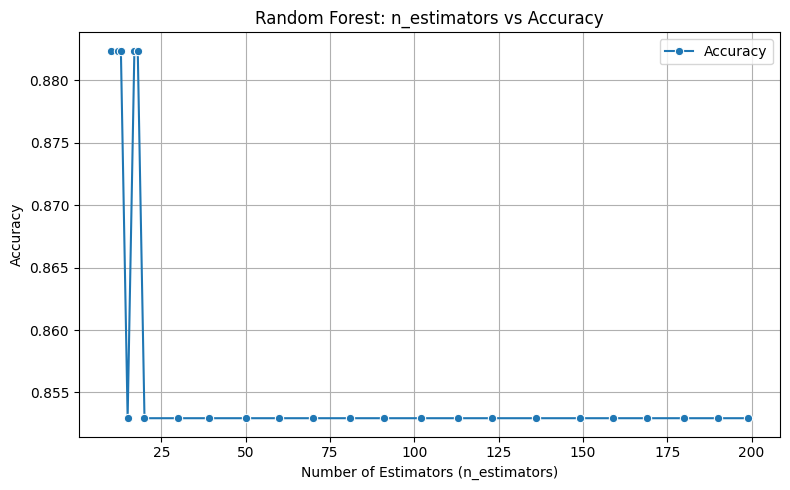

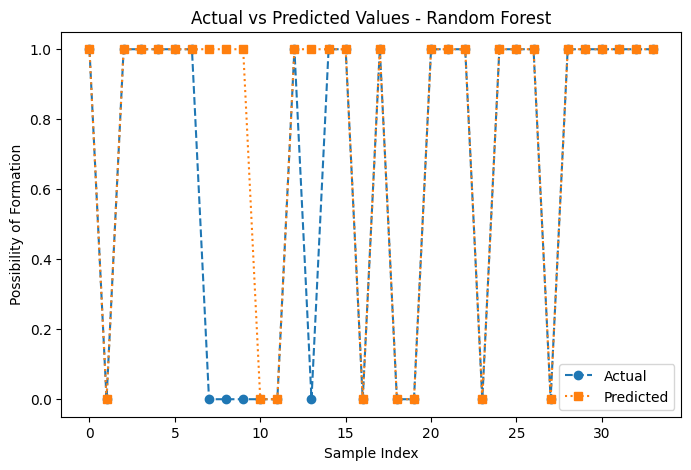

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def rf_evaluate(n_estimators):
    n_estimators = int(n_estimators)  # Convert float to int
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds={'n_estimators': (10, 200)},  # Number of trees between 10 and 200
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=20)

# Get best parameters
best_n_estimators = int(optimizer.max['params']['n_estimators'])
print(f"Best number of estimators: {best_n_estimators}")

# Train optimized Random Forest model
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Function to plot feature distributions
def plot_feature_distributions(train_df, test_df):
    feature_columns = train_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(train_df[col], kde=True, color='blue', label='Train', stat='density', alpha=0.6)
        sns.histplot(test_df[col], kde=True, color='red', label='Test', stat='density', alpha=0.6)
        plt.title(col)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values - Random Forest")
    plt.legend()
    plt.show()

# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Extract optimization history
iteration_data = []
for i, res in enumerate(optimizer.res):
    iteration_data.append({
        'iteration': i + 1,
        'n_estimators': int(res['params']['n_estimators']),
        'accuracy': res['target']
    })

# Convert to DataFrame
opt_df = pd.DataFrame(iteration_data)

# Sort by number of estimators if desired
opt_df = opt_df.sort_values(by='n_estimators')

# Plot hyperparameter vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=opt_df, x='n_estimators', y='accuracy', marker='o', label='Accuracy')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest: n_estimators vs Accuracy")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plot actual vs predicted values
plot_actual_vs_predicted(y_test, y_pred)



#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TEST DATA - SUPPLEMENTARY DATA (37 Data Points) 
#### Random Forest model using bayesian optimization  

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.8378    | 81.16     |
| 2         | 0.8378    | 190.6     |
| 3         | 0.8378    | 149.1     |
| 4         | 0.8378    | 123.7     |
| 5         | 0.8378    | 39.64     |
| 6         | 0.8378    | 105.6     |
| 7         | 0.8378    | 15.42     |
| 8         | 0.8378    | 200.0     |
| 9         | 0.8649    | 10.0      |
| 10        | 0.8649    | 10.02     |
| 11        | 0.8378    | 169.9     |
| 12        | 0.8378    | 60.41     |
| 13        | 0.8649    | 11.72     |
| 14        | 0.8378    | 136.4     |
| 15        | 0.8378    | 93.41     |
| 16        | 0.8378    | 28.38     |
| 17        | 0.8378    | 159.5     |
| 18        | 0.8378    | 180.3     |
| 19        | 0.8378    | 50.08     |
| 20        | 0.8378    | 70.76     |
| 21        | 0.8649    | 11.07     |
| 22        | 0.8378    | 114.7     |
| 23        | 0.8378    | 130.1     |
| 24        | 0.8378    | 142.7     |
| 25        

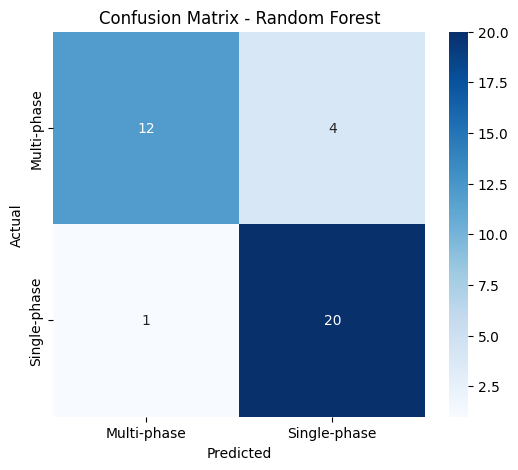

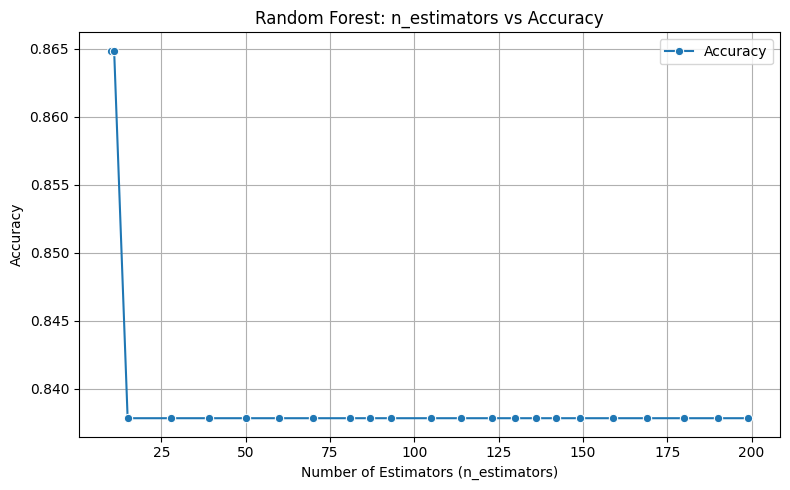

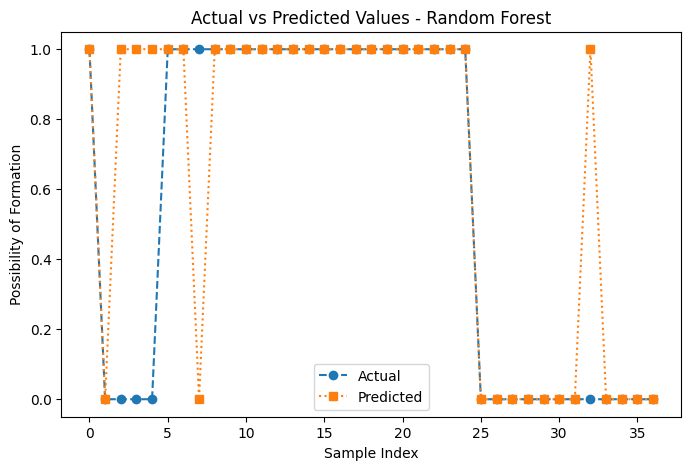

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('supplementary.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def rf_evaluate(n_estimators):
    n_estimators = int(n_estimators)  # Convert float to int
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds={'n_estimators': (10, 200)},  # Number of trees between 10 and 200
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=20)

# Get best parameters
best_n_estimators = int(optimizer.max['params']['n_estimators'])
print(f"Best number of estimators: {best_n_estimators}")

# Train optimized Random Forest model
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Extract optimization history
iteration_data = []
for i, res in enumerate(optimizer.res):
    iteration_data.append({
        'iteration': i + 1,
        'n_estimators': int(res['params']['n_estimators']),
        'accuracy': res['target']
    })

# Convert to DataFrame
opt_df = pd.DataFrame(iteration_data)

# Sort by number of estimators if desired
opt_df = opt_df.sort_values(by='n_estimators')

# Plot hyperparameter vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=opt_df, x='n_estimators', y='accuracy', marker='o', label='Accuracy')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest: n_estimators vs Accuracy")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Function to plot feature distributions
def plot_feature_distributions(train_df, test_df):
    feature_columns = train_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(train_df[col], kde=True, color='blue', label='Train', stat='density', alpha=0.6)
        sns.histplot(test_df[col], kde=True, color='red', label='Test', stat='density', alpha=0.6)
        plt.title(col)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values - Random Forest")
    plt.legend()
    plt.show()

# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot actual vs predicted values
plot_actual_vs_predicted(y_test, y_pred)


#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TESTING DATA - SPLIT (20%)
#### SVM Model using Bayesian Optimization

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.98      | -0.7528   | 0.7536    |
| 2         | 0.96      | 1.392     | -1.007    |
| 3         | 0.6       | -2.064    | -3.22     |
| 4         | 0.6       | -2.651    | 0.3309    |
| 5         | 0.96      | 0.6067    | -0.4596   |
| 6         | 1.0       | 1.918     | 0.9968    |
| 7         | 0.955     | 2.99      | -3.998    |
| 8         | 0.995     | 2.992     | -0.7591   |
| 9         | 1.0       | 0.5403    | 0.9906    |
| 10        | 1.0       | 2.975     | 0.9993    |
| 11        | 0.96      | 2.971     | -2.345    |
| 12        | 0.95      | 1.179     | -3.998    |
| 13        | 1.0       | 2.286     | 0.07755   |
| 14        | 0.96      | 1.722     | -2.822    |
| 15        | 0.99      | -0.2668   | 0.9987    |
| 16        | 1.0       | 2.995     | 0.2908    |
| 17        | 0.995     | 1.225     | 0.386     |
| 18        | 0.975     | -0.1446   | 0.3235    |


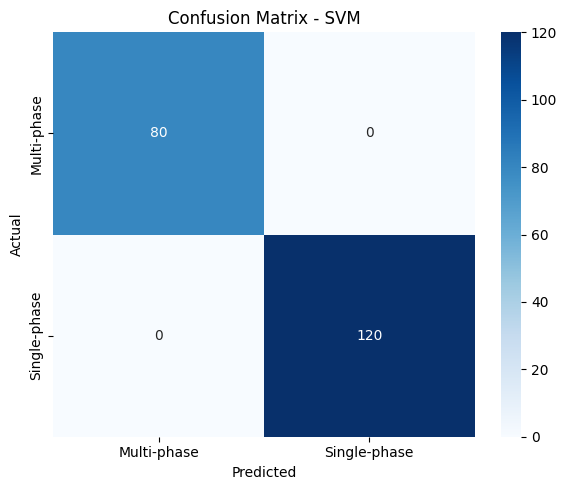

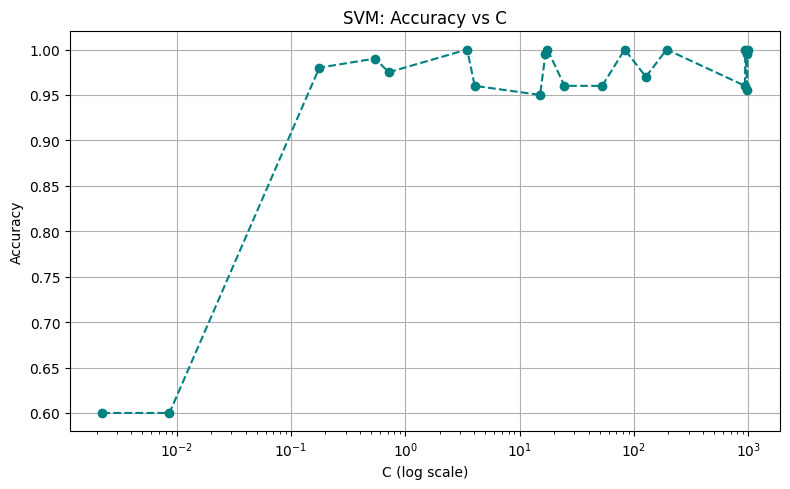

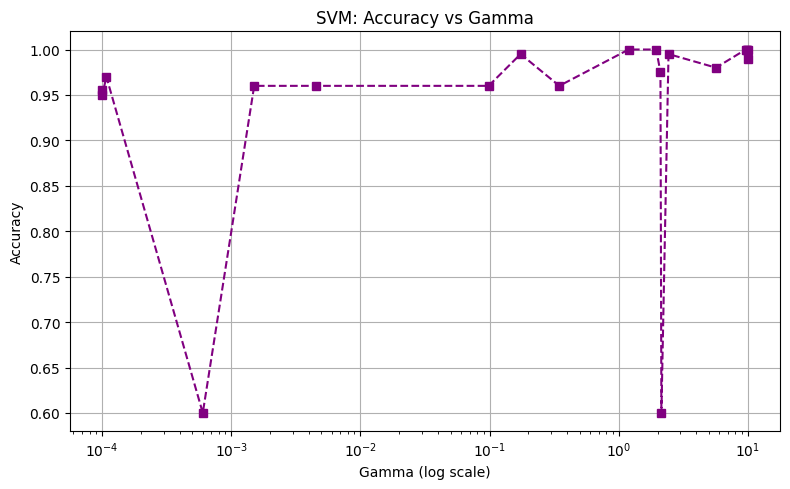

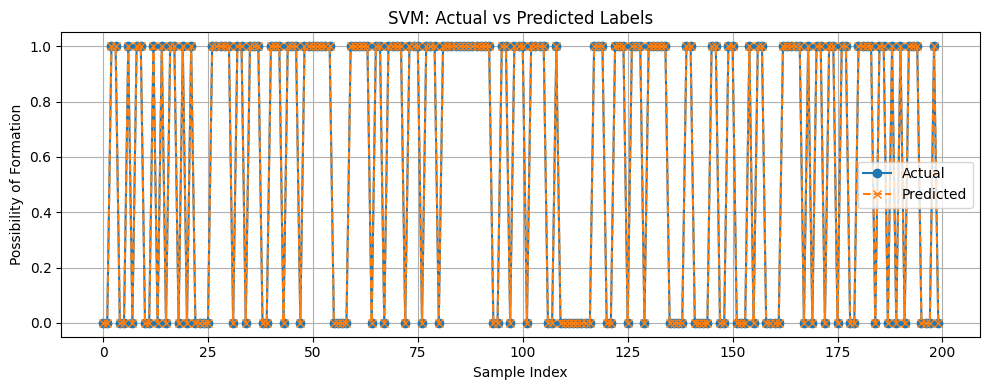

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load Data ---
df = pd.read_csv('samples_1000_CTGAN.csv')

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# --- Define Evaluation Function ---
def svm_evaluate(C, gamma):
    model = SVC(C=10**C, gamma=10**gamma, kernel='rbf', random_state=42)
    model.fit(X_train_scaled, y)
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# --- Set Bounds in log-scale for numerical stability ---
pbounds = {
    'C': (-3, 3),        # 10^-3 to 10^3
    'gamma': (-4, 1)     # 10^-4 to 10^1
}

# --- Run Bayesian Optimization ---
optimizer = BayesianOptimization(
    f=svm_evaluate,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=15)

# --- Best Parameters ---
best_params = optimizer.max['params']
best_C = 10**best_params['C']
best_gamma = 10**best_params['gamma']
print(f"\nBest SVM Parameters: C={best_C:.4f}, gamma={best_gamma:.4f}")

# --- Train Final Model with Best Params ---
best_svm = SVC(C=best_C, gamma=best_gamma, kernel='rbf', random_state=42)
best_svm.fit(X_train_scaled, y)
y_pred = best_svm.predict(X_test_scaled)

# --- Evaluate ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Multi-phase", "Single-phase"],
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

# --- Extract optimization results ---
C_values = [10 ** res["params"]["C"] for res in optimizer.res]
gamma_values = [10 ** res["params"]["gamma"] for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Convert to DataFrame for sorting/plotting ---
results_df = pd.DataFrame({
    'C': C_values,
    'gamma': gamma_values,
    'accuracy': accuracy_scores
})

# Sort by C
results_C = results_df.sort_values(by='C')
# Sort by gamma
results_gamma = results_df.sort_values(by='gamma')

# --- Plot Accuracy vs C ---
plt.figure(figsize=(8, 5))
plt.plot(results_C['C'], results_C['accuracy'], marker='o', linestyle='dashed', color='teal')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs C")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Accuracy vs gamma ---
plt.figure(figsize=(8, 5))
plt.plot(results_gamma['gamma'], results_gamma['accuracy'], marker='s', linestyle='dashed', color='purple')
plt.xscale('log')
plt.xlabel("Gamma (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs Gamma")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Actual vs Predicted Labels ---
import numpy as np
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', label='Actual')
    plt.plot(np.arange(len(y_pred)), y_pred, marker='x', linestyle='--', label='Predicted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("SVM: Actual vs Predicted Labels")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test.reset_index(drop=True), y_pred)



#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TEST DATA - BORIDES TESTING DATA (33 Data Points) 
#### SVM model using bayesian optimization  

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.9118    | -0.7528   | 0.7536    |
| 2         | 0.8529    | 1.392     | -1.007    |
| 3         | 0.6471    | -2.064    | -3.22     |
| 4         | 0.6471    | -2.651    | 0.3309    |
| 5         | 0.8824    | 0.6067    | -0.4596   |
| 6         | 0.9118    | 0.9471    | 0.9971    |
| 7         | 0.8529    | 2.99      | -3.998    |
| 8         | 0.9118    | 2.976     | 0.9502    |
| 9         | 0.8529    | 2.991     | -0.8703   |
| 10        | 0.8529    | 0.9941    | -3.975    |
| 11        | 0.9118    | -0.03711  | 0.9661    |
| 12        | 0.7941    | 2.018     | 0.4608    |
| 13        | 0.8529    | 2.159     | -2.559    |
| 14        | 0.8529    | -0.5819   | -0.4601   |
| 15        | 0.8529    | 0.4462    | -2.161    |
| 16        | 0.9118    | 0.2391    | 0.3266    |
| 17        | 0.8529    | 2.989     | -2.244    |
| 18        | 0.6471    | -0.1945   | -3.953    |


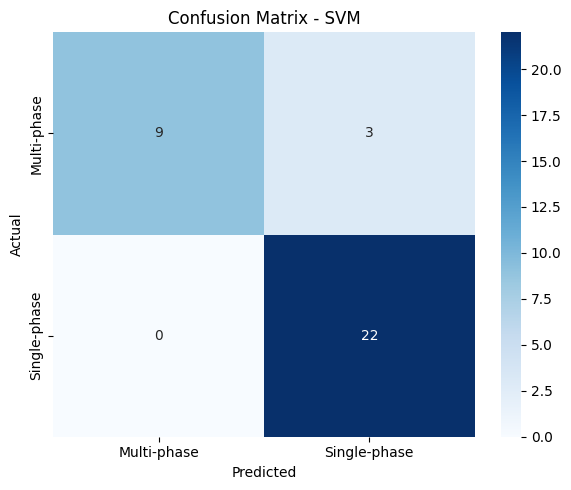

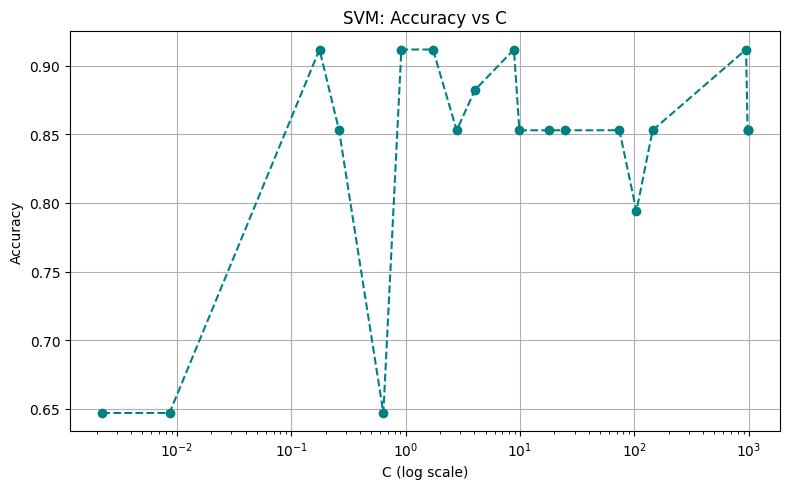

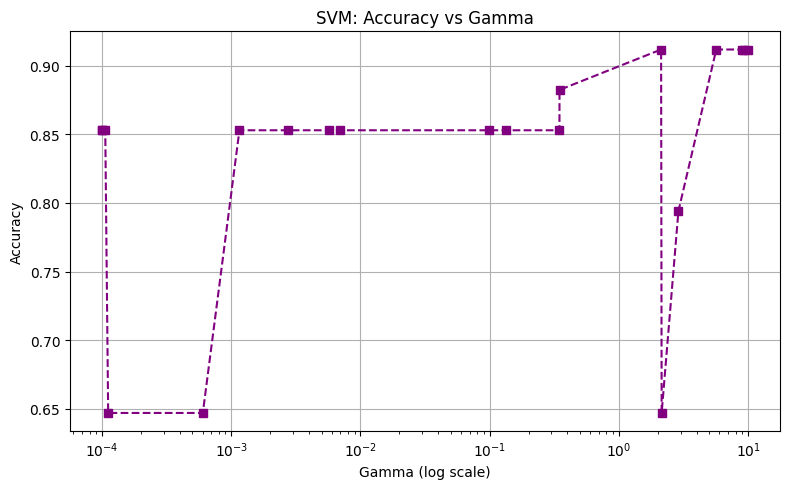

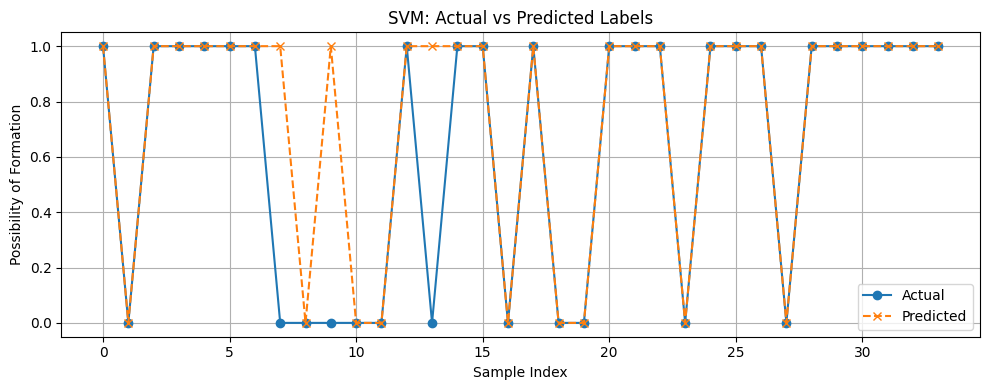

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load Data ---
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('test_set.csv')

X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# --- Define Evaluation Function ---
def svm_evaluate(C, gamma):
    model = SVC(C=10**C, gamma=10**gamma, kernel='rbf', random_state=42)
    model.fit(X_train_scaled, y)
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# --- Set Bounds in log-scale for numerical stability ---
pbounds = {
    'C': (-3, 3),        # 10^-3 to 10^3
    'gamma': (-4, 1)     # 10^-4 to 10^1
}

# --- Run Bayesian Optimization ---
optimizer = BayesianOptimization(
    f=svm_evaluate,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=15)

# --- Best Parameters ---
best_params = optimizer.max['params']
best_C = 10**best_params['C']
best_gamma = 10**best_params['gamma']
print(f"\nBest SVM Parameters: C={best_C:.4f}, gamma={best_gamma:.4f}")

# --- Train Final Model with Best Params ---
best_svm = SVC(C=best_C, gamma=best_gamma, kernel='rbf', random_state=42)
best_svm.fit(X_train_scaled, y)
y_pred = best_svm.predict(X_test_scaled)

# --- Evaluate ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Multi-phase", "Single-phase"],
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

# --- Extract optimization results ---
C_values = [10 ** res["params"]["C"] for res in optimizer.res]
gamma_values = [10 ** res["params"]["gamma"] for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Convert to DataFrame for sorting/plotting ---
results_df = pd.DataFrame({
    'C': C_values,
    'gamma': gamma_values,
    'accuracy': accuracy_scores
})

# Sort by C
results_C = results_df.sort_values(by='C')
# Sort by gamma
results_gamma = results_df.sort_values(by='gamma')

# --- Plot Accuracy vs C ---
plt.figure(figsize=(8, 5))
plt.plot(results_C['C'], results_C['accuracy'], marker='o', linestyle='dashed', color='teal')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs C")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Accuracy vs gamma ---
plt.figure(figsize=(8, 5))
plt.plot(results_gamma['gamma'], results_gamma['accuracy'], marker='s', linestyle='dashed', color='purple')
plt.xscale('log')
plt.xlabel("Gamma (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs Gamma")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Actual vs Predicted Labels ---
import numpy as np
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', label='Actual')
    plt.plot(np.arange(len(y_pred)), y_pred, marker='x', linestyle='--', label='Predicted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("SVM: Actual vs Predicted Labels")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test.reset_index(drop=True), y_pred)



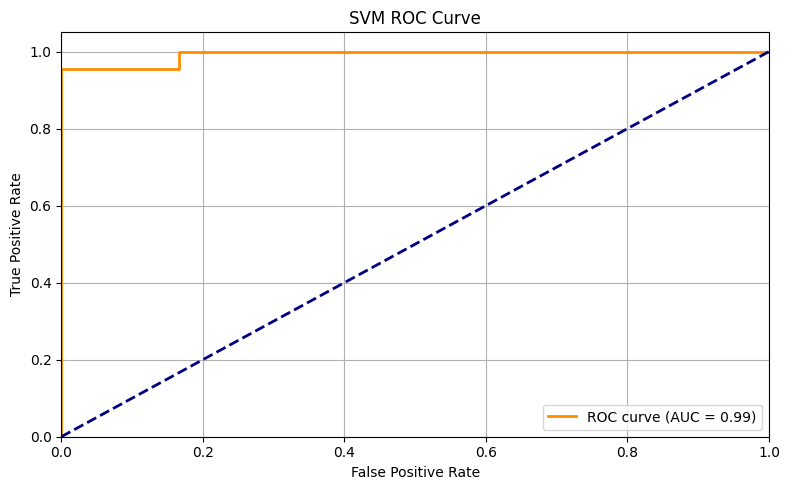

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# SVM with probability estimates enabled
svm_model = SVC(C=best_C, gamma=best_gamma, kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y)

# Get predicted probabilities for the positive class (label 1)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


#### TRAINING DATA - SYNTHETIC DATA (1000 Data points) TEST DATA - SUPPLEMENTARY DATA (37 Data Points) 
#### SVM model using bayesian optimization  

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.8919    | -0.7528   | 0.7536    |
| 2         | 0.8378    | 1.392     | -1.007    |
| 3         | 0.5676    | -2.064    | -3.22     |
| 4         | 0.5676    | -2.651    | 0.3309    |
| 5         | 0.8649    | 0.6067    | -0.4596   |
| 6         | 0.9189    | 1.216     | 0.9996    |
| 7         | 0.8649    | 2.99      | -3.998    |
| 8         | 0.9189    | 2.976     | 0.9502    |
| 9         | 0.8378    | 2.995     | -1.664    |
| 10        | 0.8649    | 1.121     | -3.98     |
| 11        | 0.9189    | 0.1494    | 0.9977    |
| 12        | 0.8108    | 2.953     | -0.02085  |
| 13        | 0.8649    | 1.887     | -2.815    |
| 14        | 0.9189    | 2.161     | 0.9956    |
| 15        | 0.8919    | -0.04332  | 0.3487    |
| 16        | 0.8649    | 0.5031    | -2.336    |
| 17        | 0.8649    | 2.996     | -3.03     |
| 18        | 0.9189    | -0.3408   | 0.9933    |


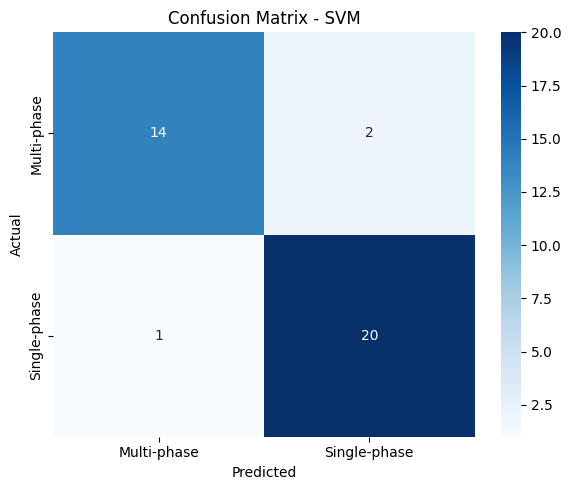

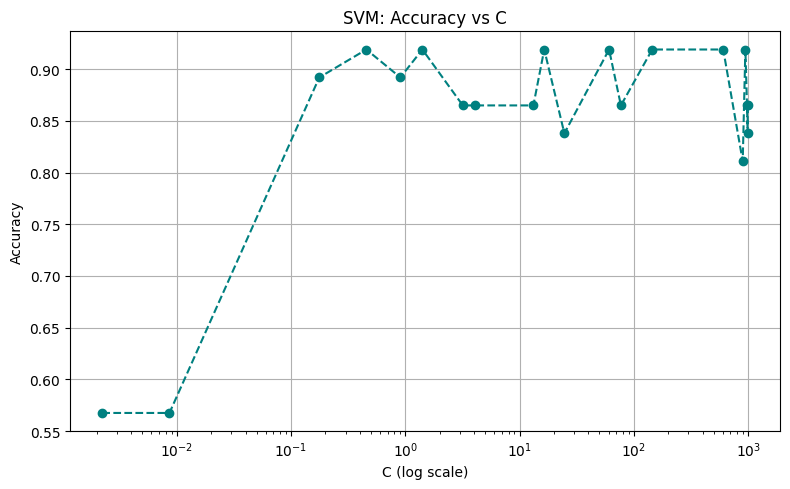

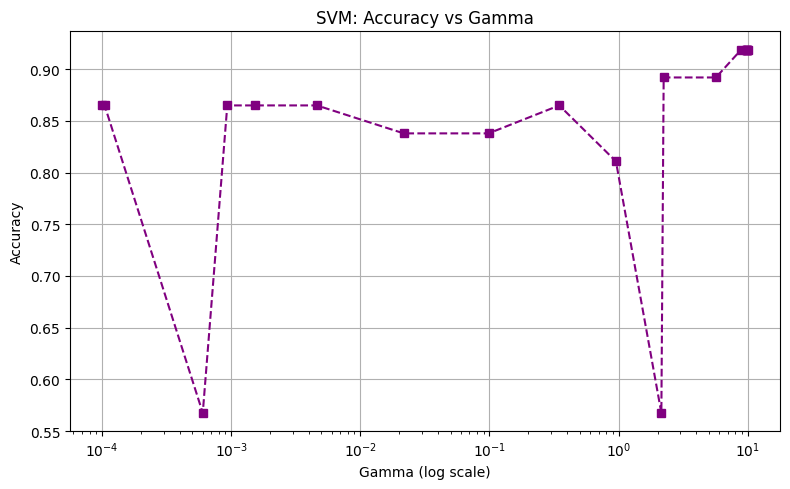

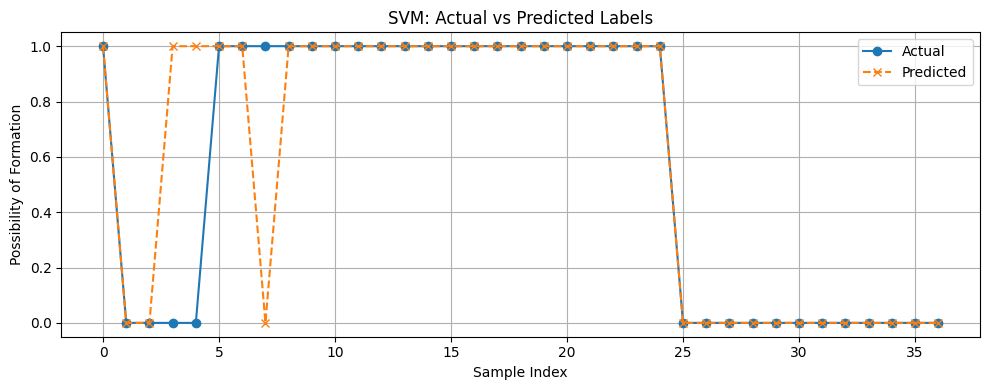

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load Data ---
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('supplementary.csv')

X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# --- Define Evaluation Function ---
def svm_evaluate(C, gamma):
    model = SVC(C=10**C, gamma=10**gamma, kernel='rbf', random_state=42)
    model.fit(X_train_scaled, y)
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# --- Set Bounds in log-scale for numerical stability ---
pbounds = {
    'C': (-3, 3),        # 10^-3 to 10^3
    'gamma': (-4, 1)     # 10^-4 to 10^1
}

# --- Run Bayesian Optimization ---
optimizer = BayesianOptimization(
    f=svm_evaluate,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=15)

# --- Best Parameters ---
best_params = optimizer.max['params']
best_C = 10**best_params['C']
best_gamma = 10**best_params['gamma']
print(f"\nBest SVM Parameters: C={best_C:.4f}, gamma={best_gamma:.4f}")

# --- Train Final Model with Best Params ---
best_svm = SVC(C=best_C, gamma=best_gamma, kernel='rbf', random_state=42)
best_svm.fit(X_train_scaled, y)
y_pred = best_svm.predict(X_test_scaled)

# --- Evaluate ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Multi-phase", "Single-phase"],
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

# --- Extract optimization results ---
C_values = [10 ** res["params"]["C"] for res in optimizer.res]
gamma_values = [10 ** res["params"]["gamma"] for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Convert to DataFrame for sorting/plotting ---
results_df = pd.DataFrame({
    'C': C_values,
    'gamma': gamma_values,
    'accuracy': accuracy_scores
})

# Sort by C
results_C = results_df.sort_values(by='C')
# Sort by gamma
results_gamma = results_df.sort_values(by='gamma')

# --- Plot Accuracy vs C ---
plt.figure(figsize=(8, 5))
plt.plot(results_C['C'], results_C['accuracy'], marker='o', linestyle='dashed', color='teal')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs C")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Accuracy vs gamma ---
plt.figure(figsize=(8, 5))
plt.plot(results_gamma['gamma'], results_gamma['accuracy'], marker='s', linestyle='dashed', color='purple')
plt.xscale('log')
plt.xlabel("Gamma (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs Gamma")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Actual vs Predicted Labels ---
import numpy as np
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', label='Actual')
    plt.plot(np.arange(len(y_pred)), y_pred, marker='x', linestyle='--', label='Predicted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("SVM: Actual vs Predicted Labels")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test.reset_index(drop=True), y_pred)

